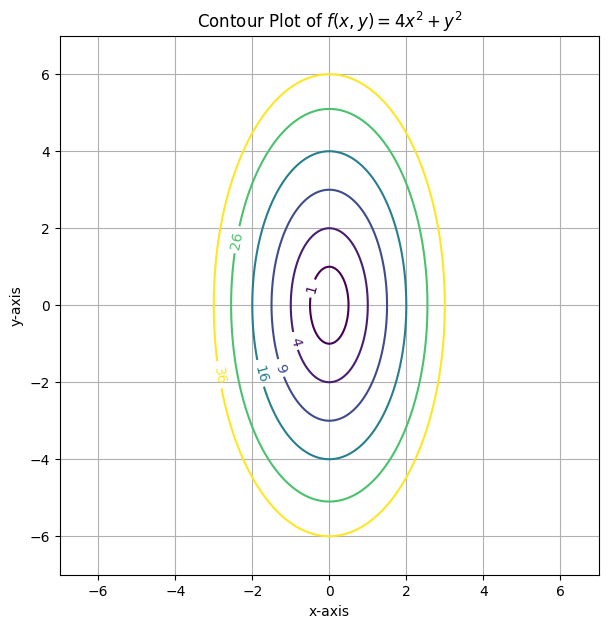

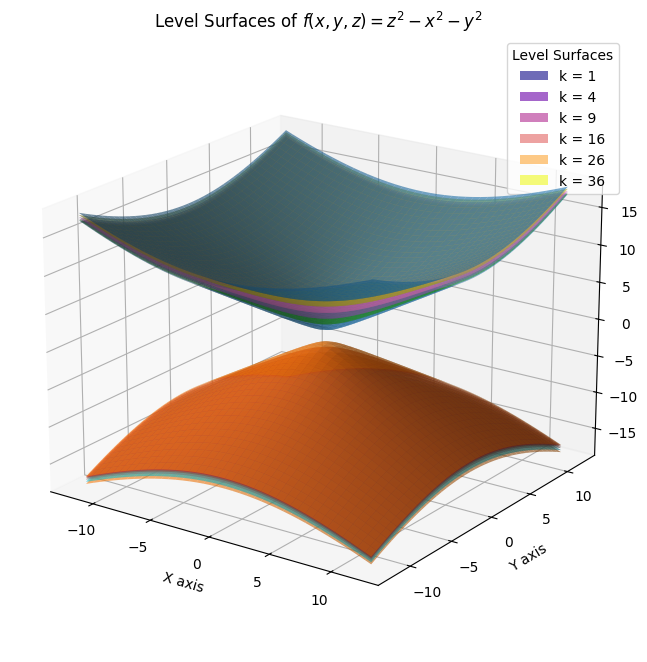

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# 2D Contour Plot for f(x,y) = 4x² + y²
x = np.linspace(-7, 7, 400)
y = np.linspace(-7, 7, 400)
X, Y = np.meshgrid(x, y)
Z = 4*X**2 + Y**2

plt.figure(figsize=(8, 7))
contours = plt.contour(X, Y, Z, levels=[1, 4, 9, 16, 26, 36])
plt.clabel(contours, inline=True, fontsize=10)
plt.title('Contour Plot of $f(x,y) = 4x^2 + y^2$')
plt.xlabel('x-axis')
plt.ylabel('y-axis')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

# 3D Level Surfaces for f(x,y,z) = z² - x² - y²
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(-12, 12, 200)
y = np.linspace(-12, 12, 200)
X, Y = np.meshgrid(x, y)

k_values = [1, 4, 9, 16, 26, 36]
colors = plt.cm.plasma(np.linspace(0, 1, len(k_values)))

for i, k in enumerate(k_values):
    Z_squared = k + X**2 + Y**2
    Z_pos = np.sqrt(Z_squared)
    Z_neg = -np.sqrt(Z_squared)
    
    ax.plot_surface(X, Y, Z_pos, alpha=0.6, rstride=5, cstride=5)
    ax.plot_surface(X, Y, Z_neg, alpha=0.6, rstride=5, cstride=5)
    

# Add legend
legend_proxies = [plt.Rectangle((0, 0), 1, 1, fc=colors[i], alpha=0.6) for i in range(len(k_values))]
ax.legend(legend_proxies, [f'k = {k}' for k in k_values], title='Level Surfaces')

ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('Level Surfaces of $f(x,y,z) = z^2 - x^2 - y^2$')
ax.view_init(elev=20., azim=-55)
plt.show()


<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\s'
<>:10: SyntaxWarning: invalid escape sequence '\c'
<>:24: SyntaxWarning: invalid escape sequence '\s'
C:\Users\arups\AppData\Local\Temp\ipykernel_1500\3161016758.py:10: SyntaxWarning: invalid escape sequence '\c'
  ax.set_title('$f(x, y) = y^2 - 2y \cos x$')
C:\Users\arups\AppData\Local\Temp\ipykernel_1500\3161016758.py:24: SyntaxWarning: invalid escape sequence '\s'
  ax.set_title('$f(x, y) = |\sin x \sin y|$')


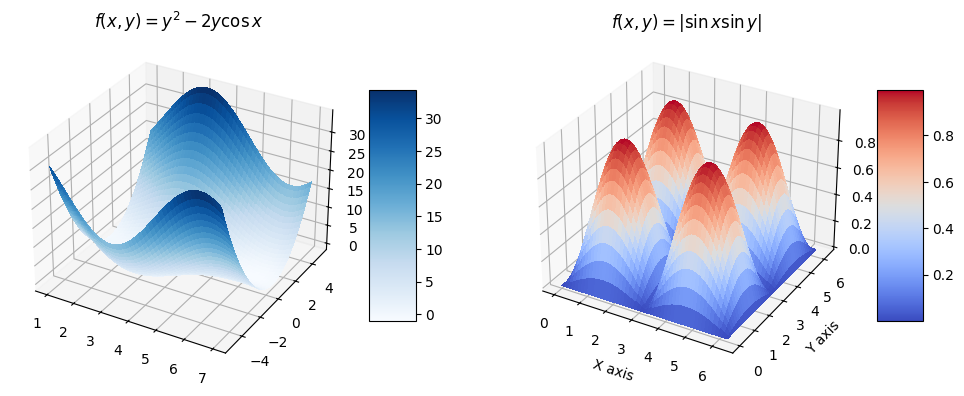

In [14]:
x = np.linspace(1, 7, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z1 = Y**2 - 2 * Y * np.cos(X)

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(121, projection='3d')
surf = ax.plot_surface(X, Y, Z1, cmap=cm.Blues, linewidth=1, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_title('$f(x, y) = y^2 - 2y \cos x$')

# Second 3D plot
x = np.linspace(0, 2*np.pi, 100)
y = np.linspace(0, 2*np.pi, 100)
X, Y = np.meshgrid(x, y)
Z2 = np.abs(np.sin(X) * np.sin(Y))

ax = fig.add_subplot(122, projection='3d')
surf = ax.plot_surface(X, Y, Z2, cmap=cm.coolwarm, linewidth=1, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel('X axis')
ax.set_ylabel('Y axis')
ax.set_zlabel('Z axis')
ax.set_title('$f(x, y) = |\sin x \sin y|$')
plt.show()

Analysis for f(x, y) = 4xy - x^4 - y^4:
Relative maximum at (-1.0, -1.0)
Saddle point at (0.0, 0.0)
Relative maximum at (1.0, 1.0)

Analysis for f(x, y) = 4x^2 e^(-y) - 2x^4 - e^(4y):


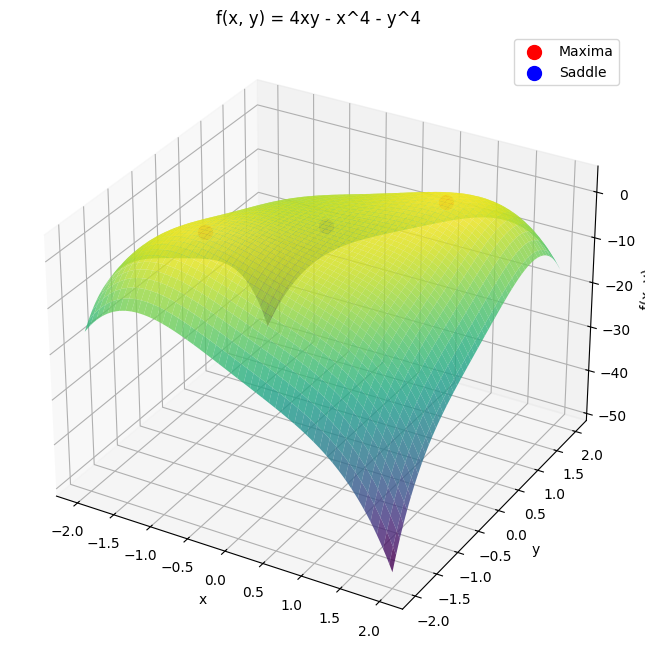

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define symbolic variables
x, y = sp.symbols('x y')

# Function 1: f(x, y) = 4xy - x^4 - y^4
f1 = 4*x*y - x**4 - y**4

# Compute partial derivatives
f1_x = sp.diff(f1, x)  # 4y - 4x^3
f1_y = sp.diff(f1, y)  # 4x - 4y^3

# Find critical points by solving f1_x = 0 and f1_y = 0
critical_points1 = sp.solve([f1_x, f1_y], (x, y))

# Compute second partial derivatives for the second derivative test
f1_xx = sp.diff(f1_x, x)  # -12x^2
f1_yy = sp.diff(f1_y, y)  # -12y^2
f1_xy = sp.diff(f1_x, y)  # 4

# Classify critical points
print("Analysis for f(x, y) = 4xy - x^4 - y^4:")
maxima1, minima1, saddles1 = [], [], []
for cp in critical_points1:
    # Ensure the critical point has real coordinates
    if not (cp[0].is_real and cp[1].is_real):
        continue
    x_val, y_val = float(cp[0]), float(cp[1])
    # Evaluate the discriminant D = f_xx * f_yy - (f_xy)^2
    D = (f1_xx.subs({x: x_val, y: y_val}) * f1_yy.subs({x: x_val, y: y_val}) - 
         f1_xy.subs({x: x_val, y: y_val})**2)
    fxx_val = f1_xx.subs({x: x_val, y: y_val})
    if D > 0:
        if fxx_val < 0:
            maxima1.append((x_val, y_val))
            print(f"Relative maximum at ({x_val}, {y_val})")
        elif fxx_val > 0:
            minima1.append((x_val, y_val))
            print(f"Relative minimum at ({x_val}, {y_val})")
    elif D < 0:
        saddles1.append((x_val, y_val))
        print(f"Saddle point at ({x_val}, {y_val})")

# Function 2: f(x, y) = 4x^2 e^(-y) - 2x^4 - e^(4y)
f2 = 4*x**2 * sp.exp(-y) - 2*x**4 - sp.exp(4*y)

# Compute partial derivatives
f2_x = sp.diff(f2, x)  # 8x e^(-y) - 8x^3
f2_y = sp.diff(f2, y)  # -4x^2 e^(-y) - 4e^(4y)

# Find critical points
critical_points2 = sp.solve([f2_x, f2_y], (x, y))

# Classify critical points (if any)
print("\nAnalysis for f(x, y) = 4x^2 e^(-y) - 2x^4 - e^(4y):")
maxima2, minima2, saddles2 = [], [], []
if not critical_points2:
    print("No critical points exist.")
else:
    f2_xx = sp.diff(f2_x, x)
    f2_yy = sp.diff(f2_y, y)
    f2_xy = sp.diff(f2_x, y)
    for cp in critical_points2:
        if not (cp[0].is_real and cp[1].is_real):
            continue
        x_val, y_val = float(cp[0]), float(cp[1])
        D = (f2_xx.subs({x: x_val, y: y_val}) * f2_yy.subs({x: x_val, y: y_val}) - 
             f2_xy.subs({x: x_val, y: y_val})**2)
        fxx_val = f2_xx.subs({x: x_val, y: y_val})
        if D > 0:
            if fxx_val < 0:
                maxima2.append((x_val, y_val))
                print(f"Relative maximum at ({x_val}, {y_val})")
            elif fxx_val > 0:
                minima2.append((x_val, y_val))
                print(f"Relative minimum at ({x_val}, {y_val})")
        elif D < 0:
            saddles2.append((x_val, y_val))
            print(f"Saddle point at ({x_val}, {y_val})")

# Plotting Function 1
def f1_num(X, Y):
    return 4*X*Y - X**4 - Y**4

X = np.linspace(-2, 2, 100)
Y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(X, Y)
Z1 = f1_num(X, Y)

fig1 = plt.figure(figsize=(10, 8))
ax1 = fig1.add_subplot(111, projection='3d')
ax1.plot_surface(X, Y, Z1, cmap='viridis', alpha=0.8)

# Mark maxima (red)
for pt in maxima1:
    ax1.scatter(pt[0], pt[1], f1_num(pt[0], pt[1]), color='red', s=100, label='Maxima' if pt == maxima1[0] else "")
# Mark minima (green) - none expected, but included for completeness
for pt in minima1:
    ax1.scatter(pt[0], pt[1], f1_num(pt[0], pt[1]), color='green', s=100, label='Minima' if pt == minima1[0] else "")
# Mark saddle points (blue)
for pt in saddles1:
    ax1.scatter(pt[0], pt[1], f1_num(pt[0], pt[1]), color='blue', s=100, label='Saddle' if pt == saddles1[0] else "")

ax1.set_title('f(x, y) = 4xy - x^4 - y^4')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.set_zlabel('f(x, y)')
ax1.legend()
plt.show()